# Case Study
Developing a Machine Learning Model to predict the selling price of a used car

## Introduction
The client is a popular for used car dealership that deals with buying and selling used cars in various regions. In order to ensure customer satisfaction, it is important to provide accurate information about the used cars and their prices. Therefore, the client has provided the dataset that contains information about the used cars sold by them.

## Problem Statement
The problem that the client is facing is to accurately estimate the selling price of the used cars they deal with. It is important to provide customers with fair and reasonable prices based on the features of the car. With the help of the dataset, the client wants to develop a pricing model that can accurately predict the selling price of a used car based on its features such as the number of kilometers driven, type of fuel used, horsepower, color, transmission, engine size, number of doors, number of cylinders, number of gears, and whether it is a sport model or not.

## Data Description
- `mon_year`: The month and year in which the car was first registered.
- `KM_driven`: The number of kilometers driven by the car.
- `Fuel_Type`: The type of fuel used by the car, either Diesel or Petrol.
- `Horse_Power`: The horsepower of the car's engine.
- `Color`: The color of the car, either Metallic or Non-Metallic.
- `Transmission`: The type of transmission used by the car, either Manual or Automatic.
- `Engine`: The size of the car's engine in cubic centimeters (cc).
- `Doors`: The number of doors the car has.
- `Cylinders`: The number of cylinders in the car's engine.
- `Gears`: The number of gears in the car's transmission.
- `Sport_Model`: A binary variable indicating whether the car is a sport model or not.
- `selling_price`: The price at which the car was sold.

Model - Predictive Model

## 1. Getting Started

### 1.1 Importing Libraries

In [69]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
from matplotlib.pyplot import figure
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 1.2 Loading the Dataset

In [70]:
df = pd.read_csv("car.csv")

# Creating a copy of the dataframe to work on the copy.
usedcars_df = df.copy()

## 2. Data Exploration

### 2.1 Descriptive Statistics

In [71]:
usedcars_df.shape

(1436, 12)

In [72]:
usedcars_df.head()

,mon_year,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price
0,Oct_2006,49805.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14310.0
1,Oct_2006,77313.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14575.0
2,Sept_2006,44214.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14787.0
3,Jul_2006,50880.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,15847.0
4,Mar_2006,40810.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,14575.0


In [73]:
usedcars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mon_year       1436 non-null   object 
 1   KM_driven      1436 non-null   float64
 2   Fuel_Type      1436 non-null   object 
 3   Horse_Power    1436 non-null   int64  
 4   Color          1436 non-null   object 
 5   Transmission   1436 non-null   object 
 6   Engine         1436 non-null   int64  
 7   Doors          1436 non-null   int64  
 8   Cylinders      1436 non-null   int64  
 9   Gears          1436 non-null   int64  
 10  Sport_Model    1436 non-null   int64  
 11  selling_price  1436 non-null   float64
dtypes: float64(2), int64(6), object(4)
memory usage: 134.8+ KB


In [74]:
usedcars_df.describe()

,KM_driven,Horse_Power,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price
count,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.000000
mean,72645.248607,101.502089,1576.85585,4.033426,4.0,5.026462,0.300139,11374.681755
std,39756.831763,14.981080,424.38677,0.952677,0.0,0.188510,0.458478,3844.583866
min,1.000000,69.000000,1300.00000,2.000000,4.0,3.000000,0.000000,4611.000000
25%,45580.000000,90.000000,1400.00000,3.000000,4.0,5.000000,0.000000,8957.000000
50%,67193.000000,110.000000,1600.00000,4.000000,4.0,5.000000,0.000000,10494.000000
75%,92242.000000,110.000000,1600.00000,5.000000,4.0,5.000000,1.000000,12667.000000
max,257580.000000,192.000000,16000.00000,5.000000,4.0,6.000000,1.000000,34450.000000


### 2.2 Checking for Null Values

In [75]:
print("Checking for Null Values:")
usedcars_df.isnull().sum()

Checking for Null Values:


mon_year         0
KM_driven        0
Fuel_Type        0
Horse_Power      0
Color            0
Transmission     0
Engine           0
Doors            0
Cylinders        0
Gears            0
Sport_Model      0
selling_price    0
dtype: int64

There is no `null value` in the dataset.

### 2.3 Unique Values

In [76]:
col_list = list(usedcars_df.columns)
# print(col_list)
print("Unique values in each column:")
for col in col_list:
    print('{} :'.format(col), usedcars_df[col].nunique()) 

Unique values in each column:
mon_year : 77
KM_driven : 1263
Fuel_Type : 3
Horse_Power : 12
Color : 2
Transmission : 2
Engine : 13
Doors : 4
Cylinders : 1
Gears : 4
Sport_Model : 2
selling_price : 236


### 2.4 Data Cleaning

In [77]:
# Splitting the column called mon_year into two columns called month and year and adding it to the dataframe
usedcars_df['month'] = usedcars_df['mon_year'].apply(lambda x: x.split('_')[0])
usedcars_df['year'] = usedcars_df['mon_year'].apply(lambda x: x.split('_')[1])

# Dropping the column called mon_year
usedcars_df.drop('mon_year', axis=1, inplace=True)

# Rearranging the columns
usedcars_df = usedcars_df[[	'month','year',	'KM_driven','Fuel_Type','Horse_Power','Color','Transmission','Engine','Doors','Cylinders','Gears','Sport_Model','selling_price']]

# Dropping the column called Cylinders
usedcars_df.drop('Cylinders', axis=1, inplace=True)

usedcars_df.head()

,month,year,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Gears,Sport_Model,selling_price
0,Oct,2006,49805.0,Diesel,90,Metallic,Manual,2000,3,5,0,14310.0
1,Oct,2006,77313.0,Diesel,90,Metallic,Manual,2000,3,5,0,14575.0
2,Sept,2006,44214.0,Diesel,90,Metallic,Manual,2000,3,5,0,14787.0
3,Jul,2006,50880.0,Diesel,90,Non-Metallic,Manual,2000,3,5,0,15847.0
4,Mar,2006,40810.0,Diesel,90,Non-Metallic,Manual,2000,3,5,0,14575.0


### 2.5 Data Visualization

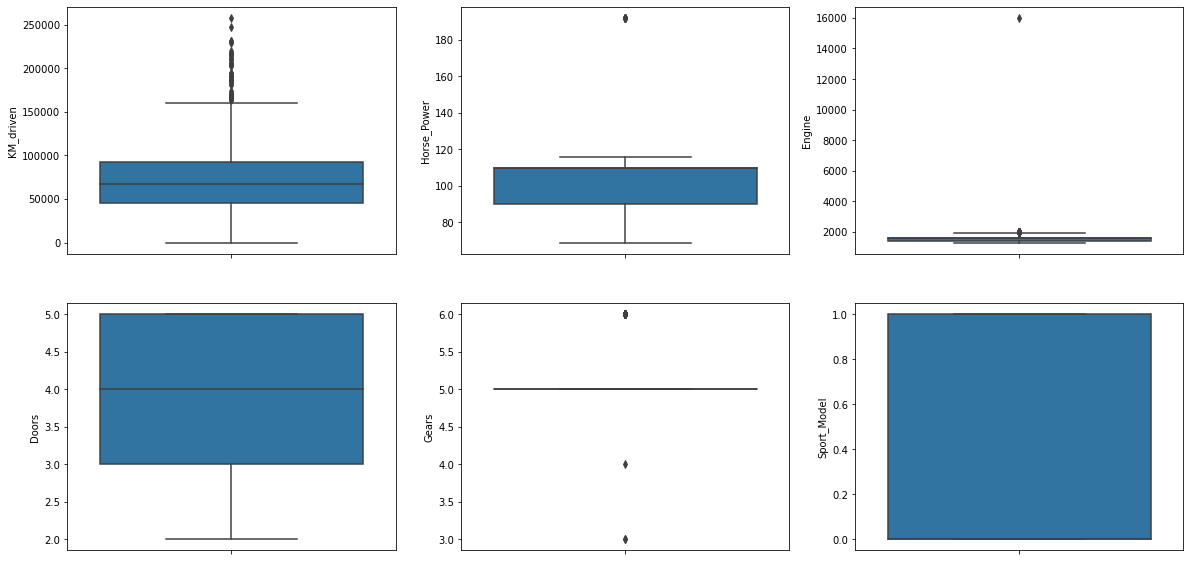

In [78]:
# Visualizing Outliers of all the features in different subplots together

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(y='KM_driven', data=usedcars_df, ax=ax[0, 0])
sns.boxplot(y='Horse_Power', data=usedcars_df, ax=ax[0, 1])
sns.boxplot(y='Engine', data=usedcars_df, ax=ax[0, 2])
sns.boxplot(y='Doors', data=usedcars_df, ax=ax[1, 0])
sns.boxplot(y='Gears', data=usedcars_df, ax=ax[1, 1])
sns.boxplot(y='Sport_Model', data=usedcars_df, ax=ax[1, 2])

plt.show()


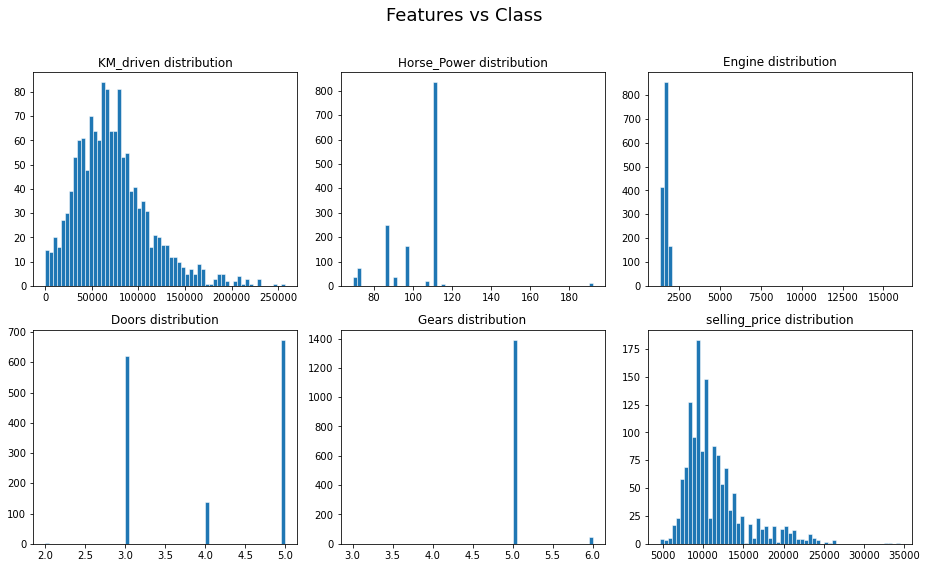

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(13,8))
fig.suptitle('Features vs Class\n', size = 18)

axes[0,0].hist(usedcars_df['KM_driven'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("KM_driven distribution")

axes[0,1].hist(usedcars_df['Horse_Power'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("Horse_Power distribution")

axes[0,2].hist(usedcars_df['Engine'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("Engine distribution")

axes[1,0].hist(usedcars_df['Doors'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Doors distribution")

axes[1,1].hist(usedcars_df['Gears'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("Gears distribution")

axes[1,2].hist(usedcars_df['selling_price'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("selling_price distribution")


plt.tight_layout()

### 2.6 Outlier Analysis
Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement , experimental errors or a novelty. In other words , an outlier is an observation that diverges from an overall pattern on a sample. 

Outliers can have a large effect on statistical analysis , as they can affect the mean and standard deviation of a data set , thus affecting the accuracy of statistical predictions.

There are two types of outliers:
1. Univariate
2. Multivariate

Univariate outliers can be found when looking at a distribution of values in a single feature space. Multivariate outliers are outliers in an n-dimensional feature space.

There are many ways to detect outliers , some of them are:
1. Z-Score
2. IQR
3. Scatter Plots
4. Box Plots
5. DBSCAN

#### 2.6.1 Z-Score
Z-Score is a way to achieve this. It is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. Z-Score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

While calculating the Z-Score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-Score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.


In [80]:
# Z-score method

# Calculate the z-scores of each value in the sample, relative to the sample mean and standard deviation
z_scores = zscore(usedcars_df['selling_price'])

# Calculate the absolute value of each z-score
abs_z_scores = np.abs(z_scores)

# Find the rows with outliers
filtered_entries = (abs_z_scores > 3)

# Print the rows with outliers
print(usedcars_df[filtered_entries])

# Remove the rows with outliers
usedcars_df = usedcars_df[~filtered_entries]

# Print the rows without outliers
usedcars_df

    month  year  KM_driven Fuel_Type  Horse_Power         Color Transmission  \
14    Jan  2006    36179.0    Petrol          192      Metallic       Manual   
15    May  2006    19863.0    Petrol          192  Non-Metallic       Manual   
16    Mar  2006    36040.0    Petrol          192      Metallic       Manual   
49    Feb  2006    68881.0    Petrol          192      Metallic       Manual   
53    Jun  2006    52858.0    Petrol          192      Metallic       Manual   
68    Nov  2006    31800.0    Diesel          110      Metallic       Manual   
89    Feb  2007    53005.0    Diesel          110      Metallic       Manual   
91    Jan  2007    39750.0    Diesel           90      Metallic       Manual   
109   May  2008        1.0    Diesel          116  Non-Metallic       Manual   
110   May  2008     4240.0    Diesel          116      Metallic       Manual   
111   May  2008     1590.0    Diesel          116      Metallic       Manual   
112   Jan  2008    14048.0    Diesel    

,month,year,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Gears,Sport_Model,selling_price
0,Oct,2006,49805.0,Diesel,90,Metallic,Manual,2000,3,5,0,14310.0
1,Oct,2006,77313.0,Diesel,90,Metallic,Manual,2000,3,5,0,14575.0
2,Sept,2006,44214.0,Diesel,90,Metallic,Manual,2000,3,5,0,14787.0
3,Jul,2006,50880.0,Diesel,90,Non-Metallic,Manual,2000,3,5,0,15847.0
4,Mar,2006,40810.0,Diesel,90,Non-Metallic,Manual,2000,3,5,0,14575.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Dec,2002,21777.0,Petrol,86,Metallic,Manual,1300,3,5,1,7950.0
1432,Sept,2002,20140.0,Petrol,86,Non-Metallic,Manual,1300,3,5,1,11496.0
1433,Oct,2002,18037.0,Petrol,86,Non-Metallic,Manual,1300,3,5,0,9010.0
1434,Nov,2002,17931.0,Petrol,86,Metallic,Manual,1300,3,5,0,7685.0


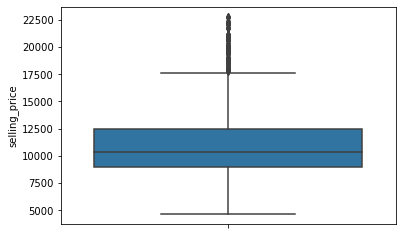

In [81]:
# Plot the data
sns.boxplot(y=usedcars_df['selling_price'])
plt.show()

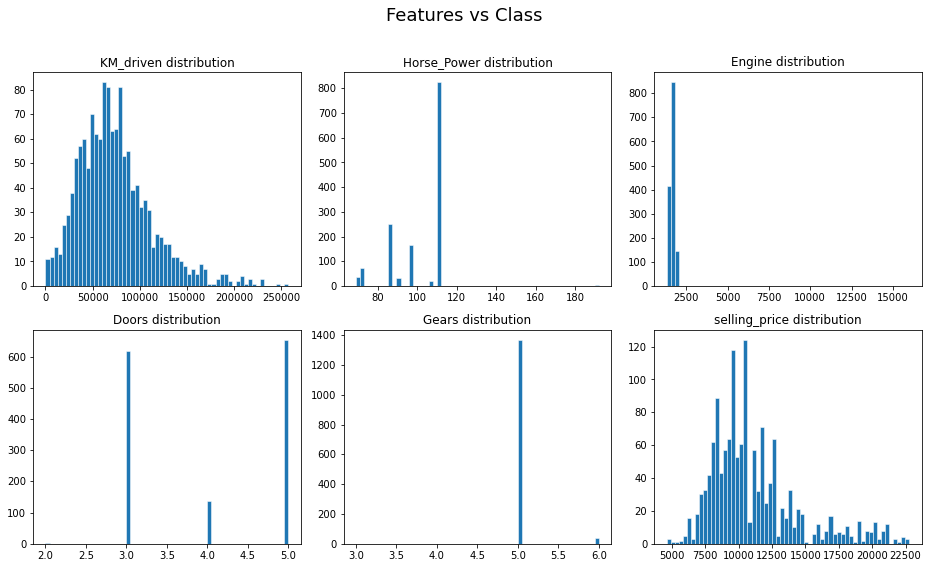

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(13,8))
fig.suptitle('Features vs Class\n', size = 18)

axes[0,0].hist(usedcars_df['KM_driven'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("KM_driven distribution")

axes[0,1].hist(usedcars_df['Horse_Power'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("Horse_Power distribution")

axes[0,2].hist(usedcars_df['Engine'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("Engine distribution")

axes[1,0].hist(usedcars_df['Doors'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Doors distribution")

axes[1,1].hist(usedcars_df['Gears'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("Gears distribution")

axes[1,2].hist(usedcars_df['selling_price'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("selling_price distribution")


plt.tight_layout()

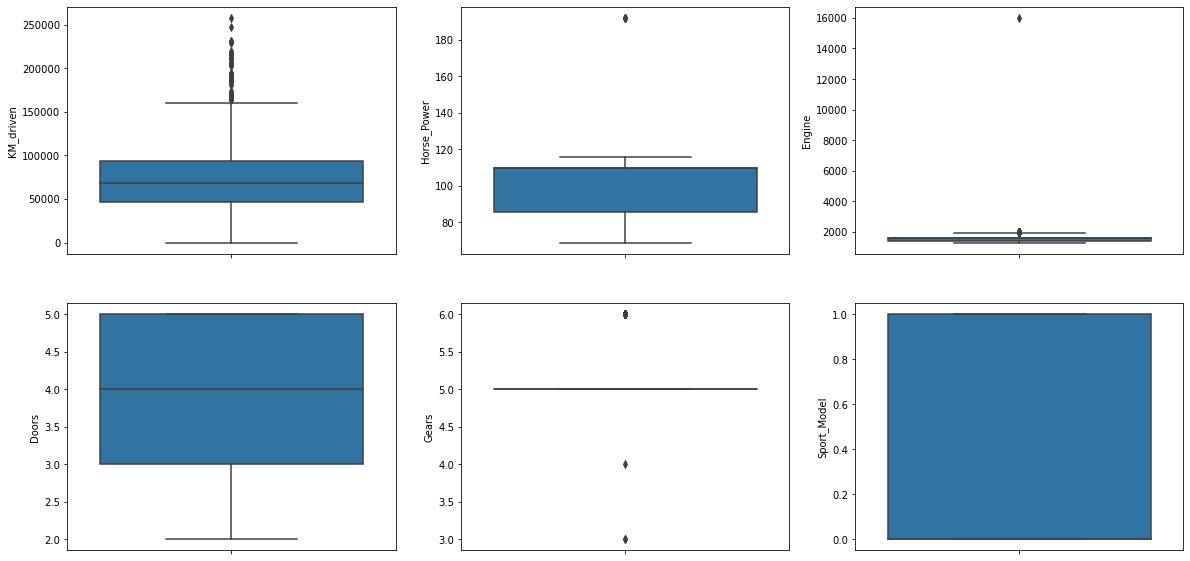

In [83]:
# Visualizing Outliers of all the features in different subplots together

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(y='KM_driven', data=usedcars_df, ax=ax[0, 0])
sns.boxplot(y='Horse_Power', data=usedcars_df, ax=ax[0, 1])
sns.boxplot(y='Engine', data=usedcars_df, ax=ax[0, 2])
sns.boxplot(y='Doors', data=usedcars_df, ax=ax[1, 0])
sns.boxplot(y='Gears', data=usedcars_df, ax=ax[1, 1])
sns.boxplot(y='Sport_Model', data=usedcars_df, ax=ax[1, 2])

plt.show()


#### 2.6.2 DBSCAN
DBSCAN is a density-based clustering algorithm that can be used to detect outliers. DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This algorithm is one of the most common clustering algorithms and works based on density of object. The whole idea is that if a particular point belongs to a cluster , it should be near to lots of other points in that cluster.

DBSCAN has two parameters:
1. eps: It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered as neighbors. If the eps value is chosen too small then large part of the data will be considered as outliers. If it is chosen very large then the clusters will merge and majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.
2. min_samples: The minimum number of neighbors (data points) within eps radius.

##### 2.6.2.1 DBSCAN Implementation
We will be using DBSCAN to detect outliers in our dataset. We will be using the following steps:
1. Importing Libraries
2. Loading Dataset
3. Data Preprocessing
4. DBSCAN Implementation
5. Outlier Detection
6. Visualizing Outliers
7. Removing Outliers
8. Visualizing Outliers Removed
 

In [133]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(usedcars_df)

# Normalize the data so that all variables have a maximum value of 1
X_norm = normalize(X_std)

# Reduce the data dimensions to 3 principal components
X_pca = PCA(n_components=3).fit_transform(X_norm)

# Calculate predicted values
db = DBSCAN(eps=0.3, min_samples=10).fit(X_pca)
labels = db.labels_

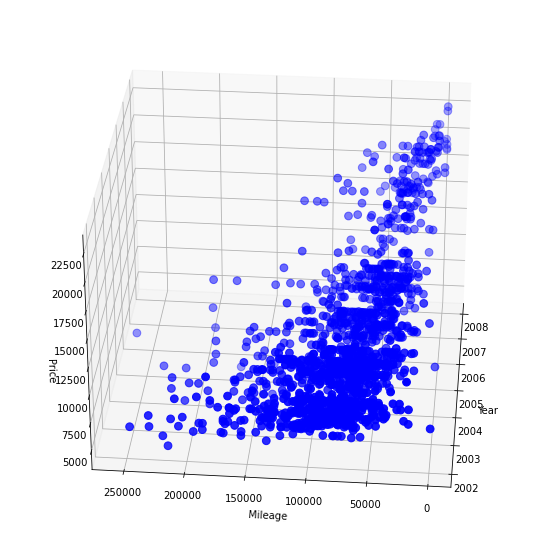

In [134]:
# Plotting the data
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(usedcars_df['year'], usedcars_df['KM_driven'], usedcars_df['selling_price'], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel('Year')
plt.ylabel('Mileage')
ax.set_zlabel('Price')
plt.show()

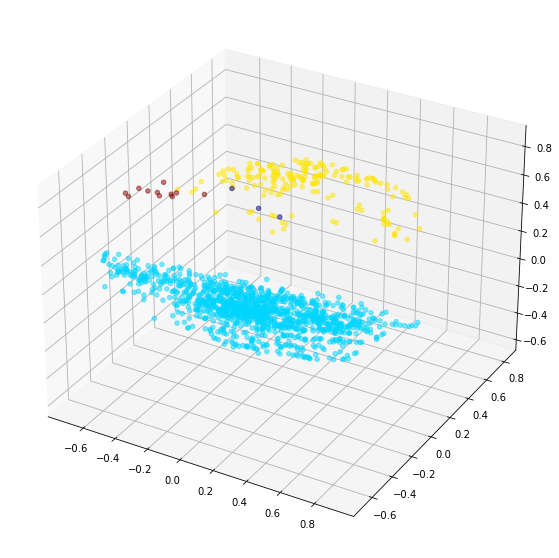

In [135]:
# Plot the reduced data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels, cmap='jet', marker='o', alpha=0.5)

plt.show()

In [137]:
# # Plot the original data with clusters
# plt.figure(figsize=(10,10))
# plt.scatter(usedcars_df['x'], usedcars_df['y'], c=labels, cmap='jet', marker='o', alpha=0.5)
# plt.scatter(usedcars_df['x'], usedcars_df['y'], c=labels, cmap='jet', marker='o', alpha=0.5)
# plt.show()

In [88]:
# Multivariate Analysis
usedcars_df = usedcars_df[['month','year','KM_driven','Fuel_Type','Horse_Power','Color','Transmission','Engine','Doors','Gears','Sport_Model','selling_price']]
usedcars_df.head()

,month,year,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Gears,Sport_Model,selling_price
0,Oct,2006,49805.0,Diesel,90,Metallic,Manual,2000,3,5,0,14310.0
1,Oct,2006,77313.0,Diesel,90,Metallic,Manual,2000,3,5,0,14575.0
2,Sept,2006,44214.0,Diesel,90,Metallic,Manual,2000,3,5,0,14787.0
3,Jul,2006,50880.0,Diesel,90,Non-Metallic,Manual,2000,3,5,0,15847.0
4,Mar,2006,40810.0,Diesel,90,Non-Metallic,Manual,2000,3,5,0,14575.0


In [89]:
usedcars_col_list = ['selling_price', 'KM_driven', 'Engine', 'Horse_Power']
for col in usedcars_col_list:
    print('{}: '.format(col), usedcars_df[usedcars_df[col] == 0].year.count())

selling_price:  0
KM_driven:  0
Engine:  0
Horse_Power:  0


### 2.7 Correlation Matrix
This shows how different variables are related to each other and the selling price. Correlation coefficient values range from -1 to 1. If the coefficient is closer to 1, it means that there is a strong positive correlation between the two variables. When it is closer to -1, the variables have a strong negative correlation.

In [90]:
usedcars_df.dtypes

month             object
year              object
KM_driven        float64
Fuel_Type         object
Horse_Power        int64
Color             object
Transmission      object
Engine             int64
Doors              int64
Gears              int64
Sport_Model        int64
selling_price    float64
dtype: object

<AxesSubplot:>

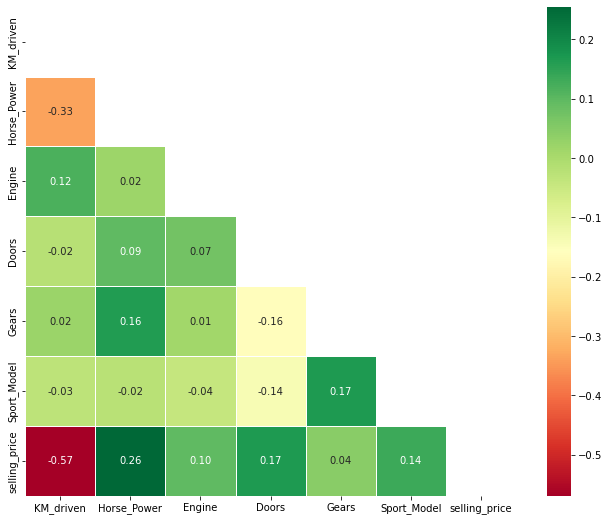

In [91]:
# Include only numeric columns in the DataFrame used for corr()
numeric_cols = usedcars_df.select_dtypes(include=[np.number])
corr_mat = numeric_cols.corr()

# Continue to generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Size of heatmap
plt.subplots(figsize=(11,9))

# Diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_mat, mask=mask, cmap='RdYlGn', annot=True, fmt=".2f", linewidths=.5)


## 3. Data Visualization

### 3.1 Pair Plot

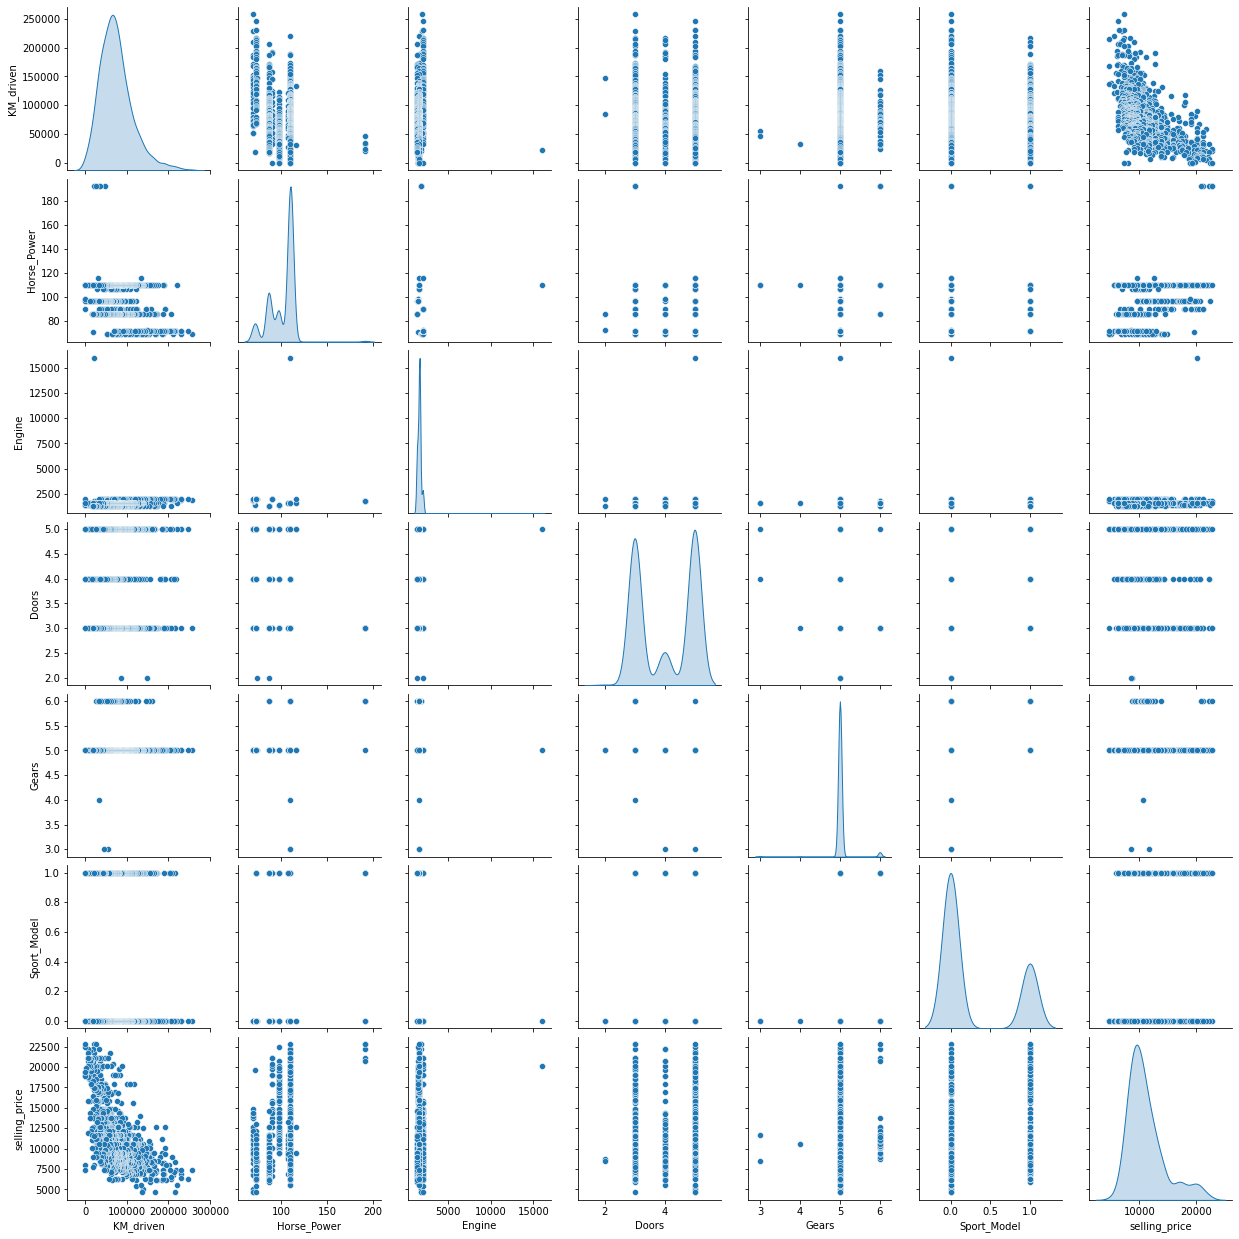

In [92]:
sns.pairplot(usedcars_df, palette='coolwarm', diag_kind='kde')


<AxesSubplot:xlabel='selling_price', ylabel='Count'>

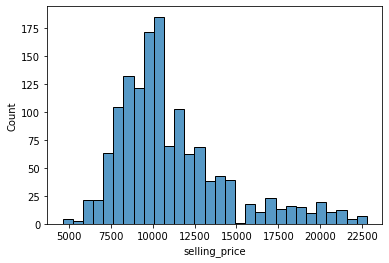

In [93]:
sns.histplot(data=usedcars_df, x='selling_price')

## 1.5 Encoding Categorical Variables
From observations , we can see that `Month`, `Fuel_Type`, `Color`, and `Transmission` are the categorical variables. A Machine Learning model understands only the numerical data hence coulumn of categorical data should be converted into numerical using the technique of `One-Hot-Encoding`.

In [94]:
# Import the necessary module
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(drop='first')

# Fit the OneHotEncoder  
encoded_features = encoder.fit_transform(usedcars_df[['month', 'Fuel_Type','Color', 'Transmission']])
encoded_features = pd.get_dummies(usedcars_df[['month', 'Fuel_Type','Color', 'Transmission']], drop_first=True)

# Adding these encoded features back to the original dataframe
usedcars_df = pd.concat([usedcars_df, encoded_features], axis=1)

# Dropping the categorical columns
usedcars_df = usedcars_df.drop(['month', 'Fuel_Type','Color', 'Transmission'], axis=1)

usedcars_df['year'] = usedcars_df['year'].astype(int)


In [95]:
usedcars_df.head()

,year,KM_driven,Horse_Power,Engine,Doors,Gears,Sport_Model,selling_price,month_Aug,month_Dec,...,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,Fuel_Type_Diesel,Fuel_Type_Petrol,Color_Non-Metallic,Transmission_Manual
0,2006,49805.0,90,2000,3,5,0,14310.0,False,False,...,False,False,False,False,True,False,True,False,False,True
1,2006,77313.0,90,2000,3,5,0,14575.0,False,False,...,False,False,False,False,True,False,True,False,False,True
2,2006,44214.0,90,2000,3,5,0,14787.0,False,False,...,False,False,False,False,False,True,True,False,False,True
3,2006,50880.0,90,2000,3,5,0,15847.0,False,False,...,False,False,False,False,False,False,True,False,True,True
4,2006,40810.0,90,2000,3,5,0,14575.0,False,False,...,False,True,False,False,False,False,True,False,True,True


<AxesSubplot:>

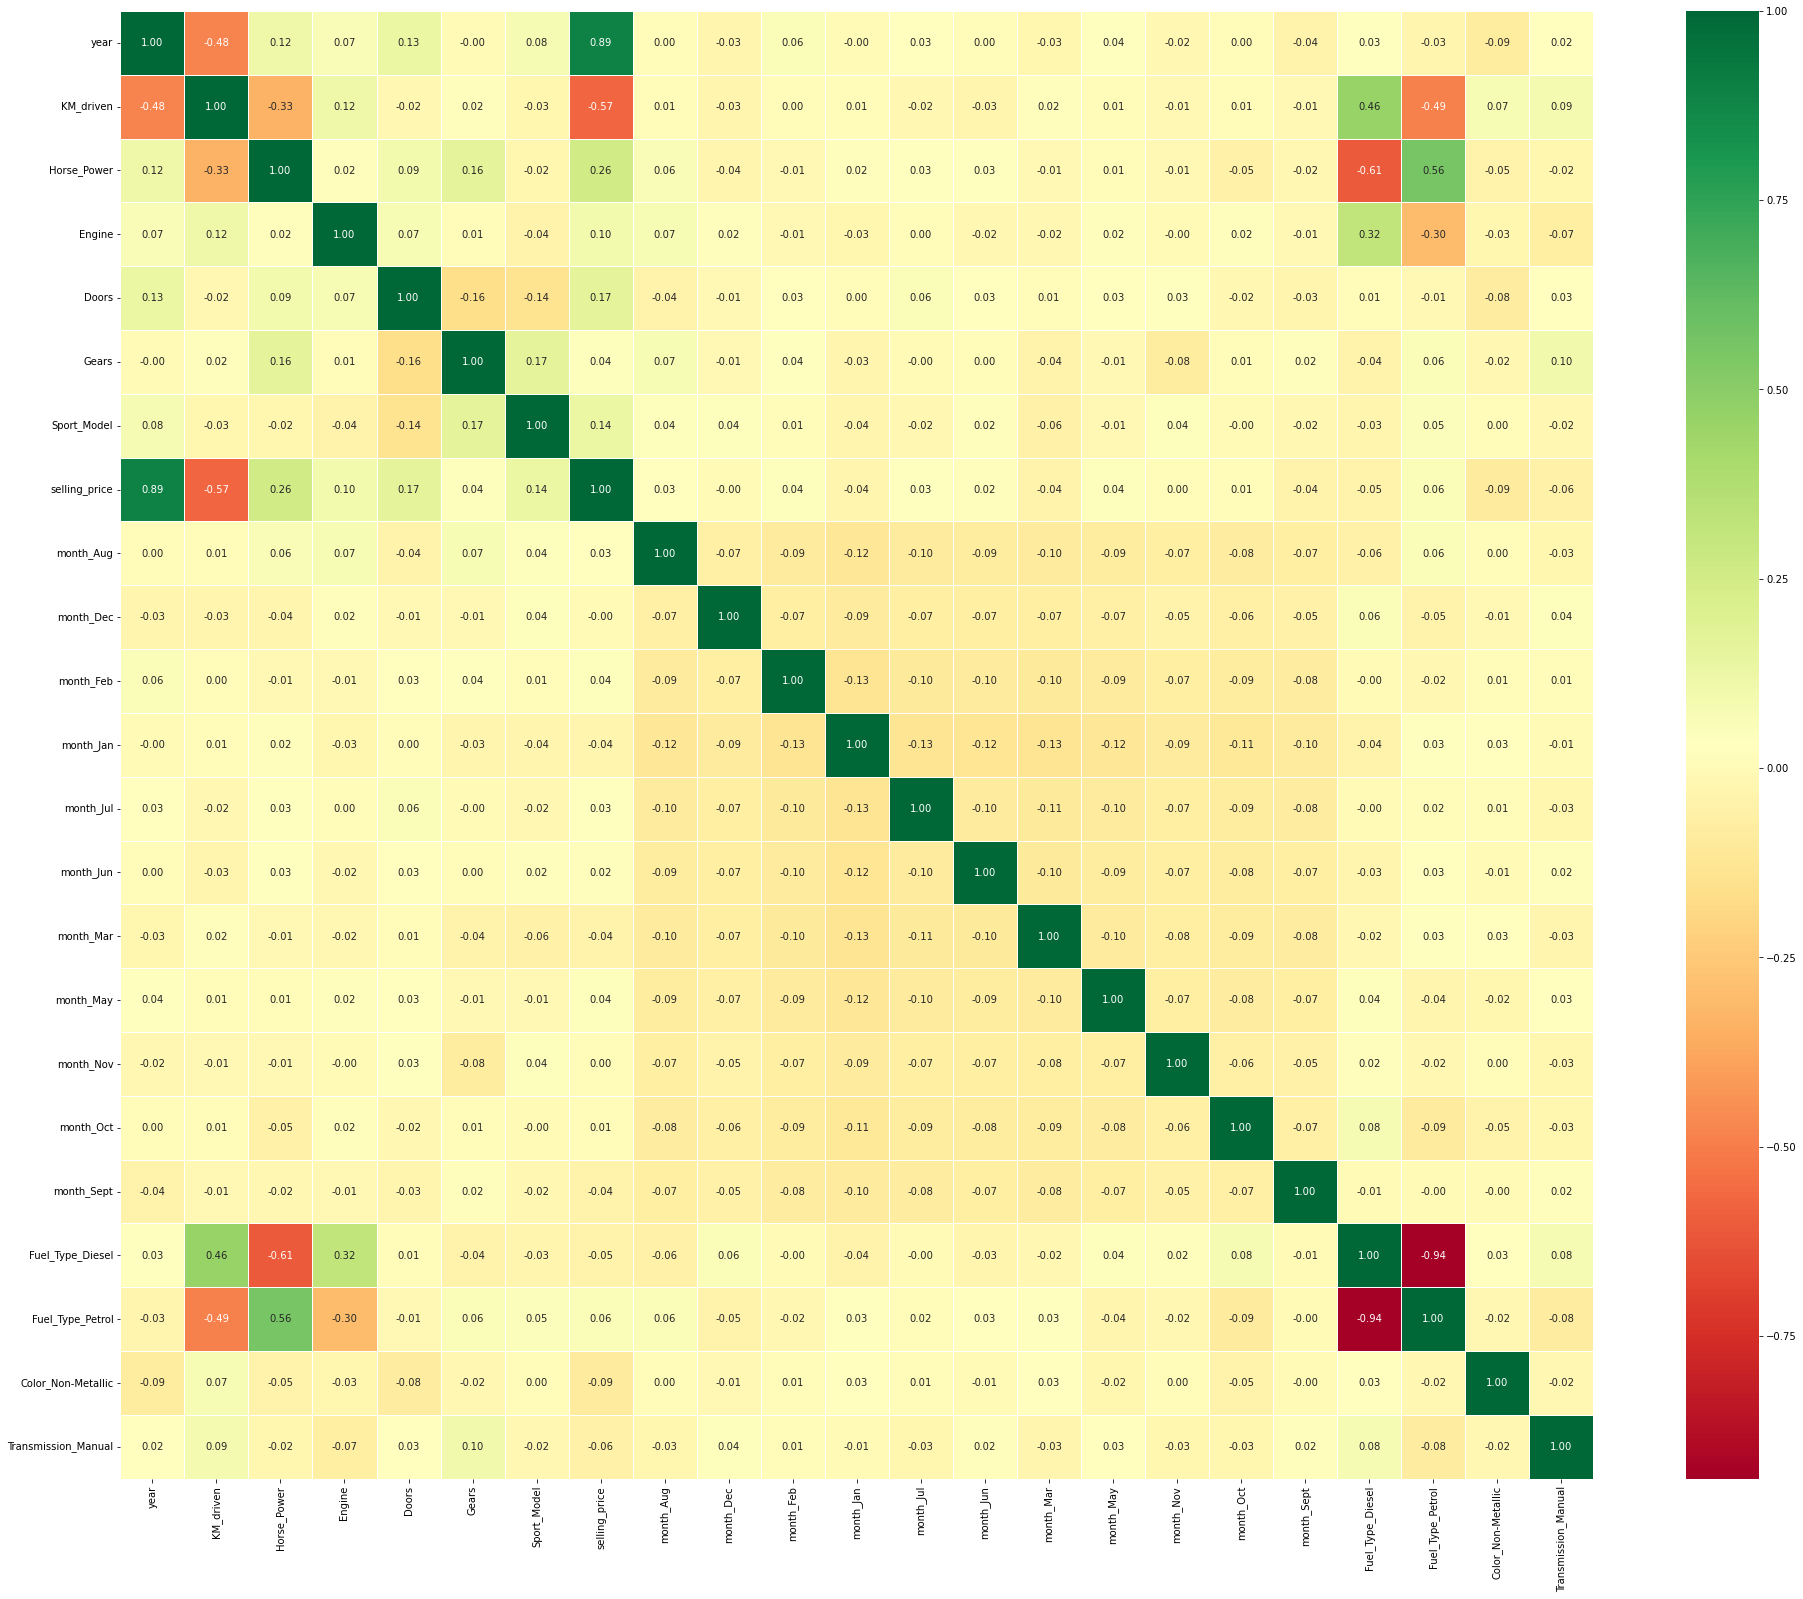

In [96]:
# Heatmap for correlation between features
corr = usedcars_df.corr()

plt.subplots(figsize=(33,27))

# Diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap='RdYlGn', annot=True, fmt=".2f", linewidths=.5)



# 2. Model Building

In [97]:
from sklearn.model_selection import train_test_split
X = usedcars_df.drop('selling_price', axis=1)
y = usedcars_df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Import necessary models and evaluation metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Instantiate models
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(), 
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boost": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(objective ='reg:squarederror'),
}

# Prepare a dictionary to store the results
results = {}

# Iterate over models dictionary and train each model. Print and store each model's MAE, R2, and RMSE score
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae_score = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    results[model_name] = {"MAE": mae_score, "R2": r2, "RMSE": rmse}
    
    # print(f"{model_name} MAE: {mae_score}, R2: {r2}, RMSE: {rmse}")

# Output the results
for model_name, metrics in results.items():
    print(f"{model_name}\nMAE: {metrics['MAE']}, R2: {metrics['R2']}, RMSE: {metrics['RMSE']}\n")


Linear Regression
MAE: 978.6076721237785, R2: 0.8246229744997557, RMSE: 1243.1250509374863

Logistic Regression
MAE: 2139.04609929078, R2: -0.07893006534207103, RMSE: 3083.366261085439

Decision Tree
MAE: 1016.2872340425532, R2: 0.8122550286840013, RMSE: 1286.2122010932467

Random Forest
MAE: 811.9841016548463, R2: 0.8777028097543146, RMSE: 1038.0940646932054

Gradient Boost
MAE: 784.4768401160892, R2: 0.8872568358115228, RMSE: 996.7209298388542

XGBoost
MAE: 876.0966156222296, R2: 0.8554617938466436, RMSE: 1128.5473843442514



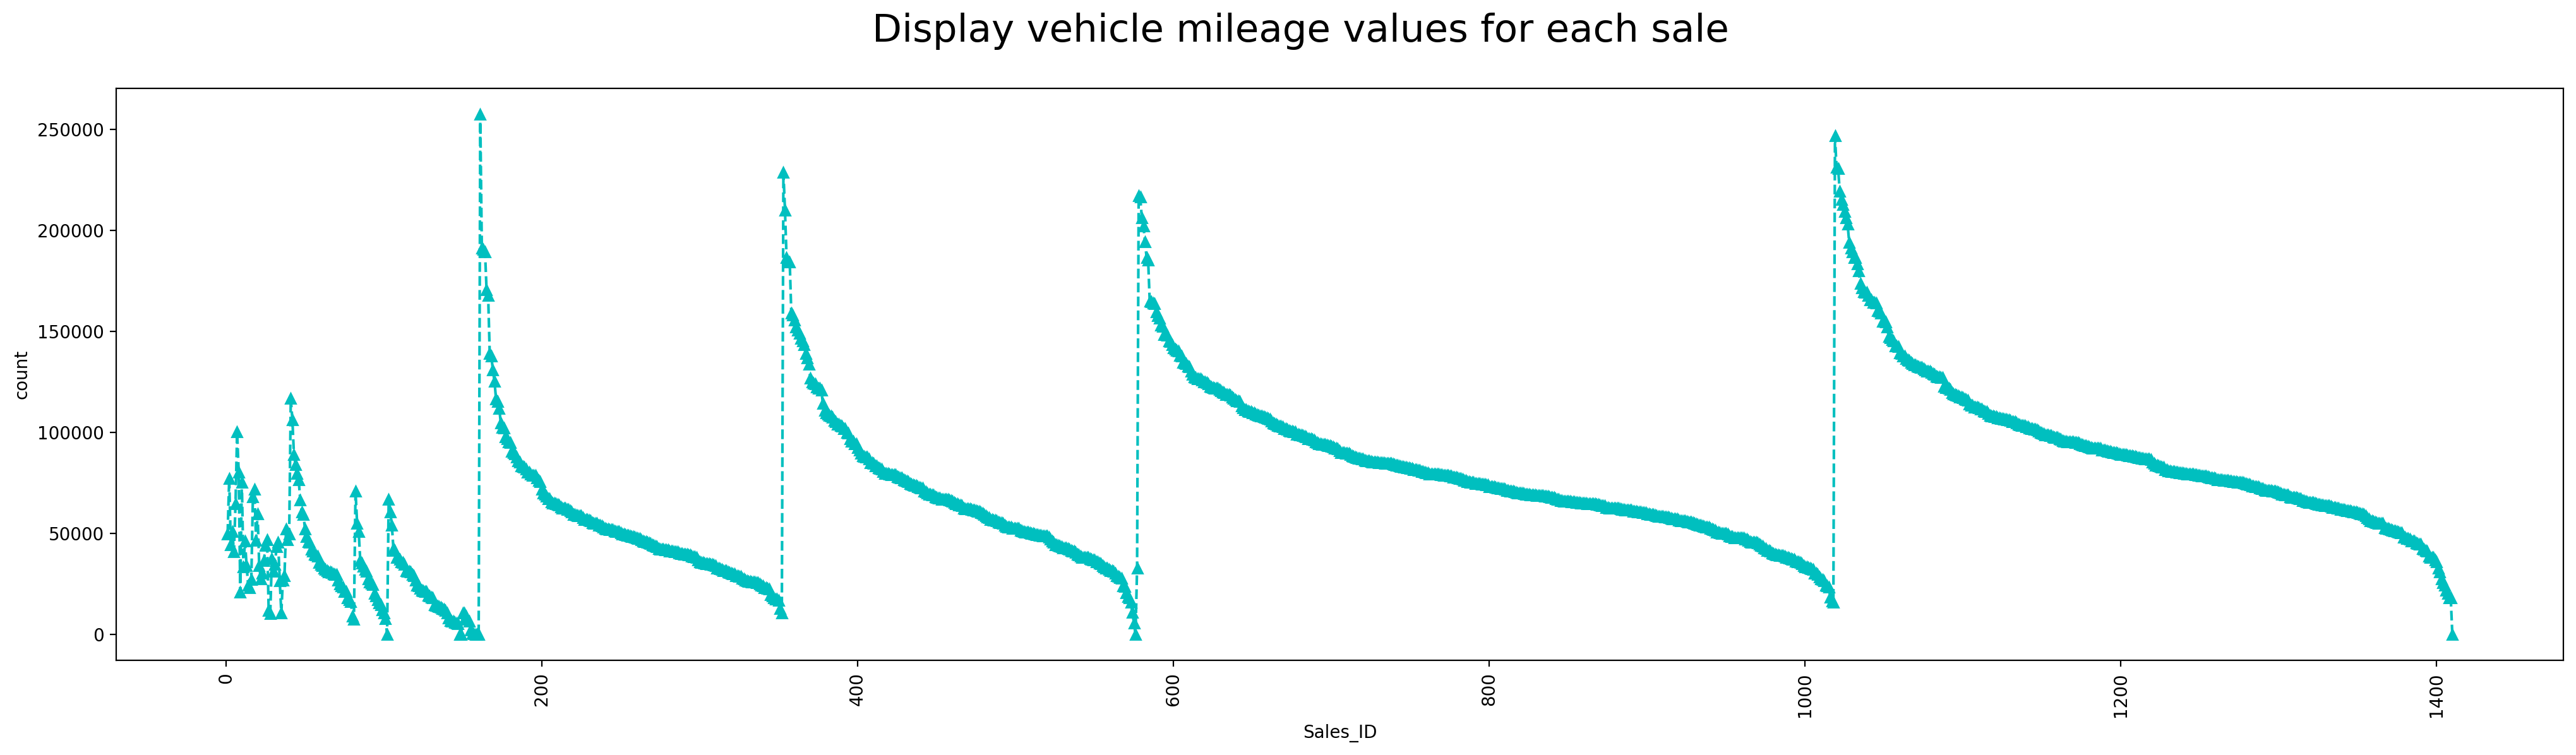

In [99]:
import matplotlib.pyplot as plt

# Convert 'KM_driven' column to a NumPy array
km_driven_array = usedcars_df['KM_driven'].to_numpy()

# Create a numeric index for the x-axis
sales_index = range(1, len(usedcars_df) + 1)

# Plot the data
plt.figure(figsize=(25, 6), dpi=200)
plt.plot(sales_index, km_driven_array, 'c^--')

plt.suptitle('Display vehicle mileage values for each sale\n', size = 22)
# plt.title('Display vehicle mileage values for each sale')

plt.ylabel('count')
plt.xlabel('Sales_ID')
plt.xticks(rotation=90)
plt.show()


# Data Cleaning

In [100]:
usedcars_missing_df = pd.concat([(usedcars_df.isnull().sum()*100/usedcars_df.isnull().count()).sort_values(ascending=False)], axis=1, keys=["percentage"])
usedcars_missing_df[usedcars_missing_df["percentage"] > 10]

,percentage


No missing values found in the dataset

### Creating Numeric and Non-numeric features list

In [101]:
print(usedcars_df.select_dtypes(include=['int64','float64']).columns)
print(usedcars_df.select_dtypes(include=['object']).columns)

Index(['KM_driven', 'Horse_Power', 'Engine', 'Doors', 'Gears', 'Sport_Model',
       'selling_price'],
      dtype='object')
Index([], dtype='object')


## Identifying Outliers

In [102]:
# Replacing 0 values with median as log(0) is infinite which cannot be plotted later after log transformation
for col in usedcars_col_list:
    usedcars_df[col].replace(0,np.nan,inplace=True)
    usedcars_df[col].fillna(usedcars_df[col].median(),inplace=True)

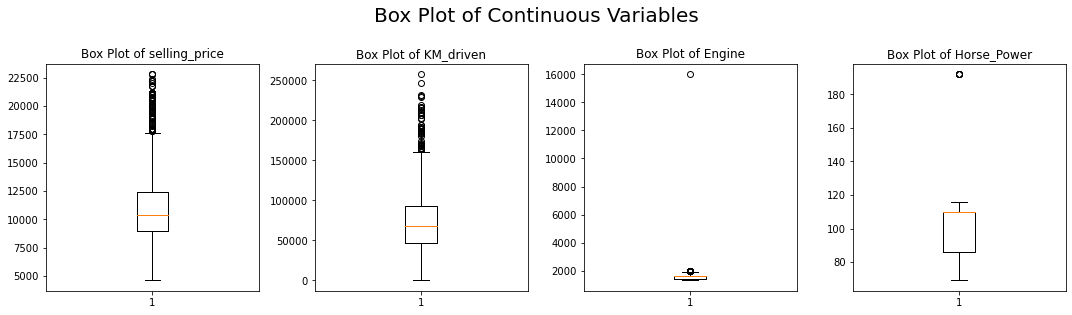

In [103]:
# Checking if there are any outliers using Box Plot for continuous variables

fig = plt.figure(figsize = (15,15))

for i, col in enumerate(usedcars_col_list):
    plt.suptitle("Box Plot of Continuous Variables\n", fontsize=20)
    plt.subplot(len(usedcars_col_list),4,i+1)
    plt.boxplot(usedcars_df[col])
    plt.title("Box Plot of {}".format(col))
fig.tight_layout()
plt.show()

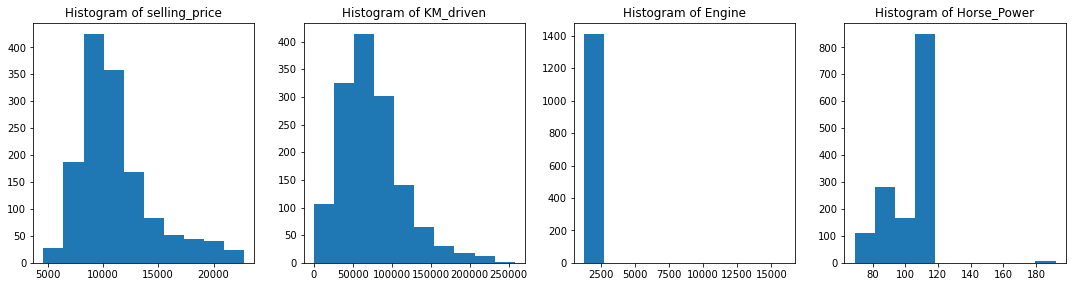

In [104]:
# Checking Normality for continuous variables
fig = plt.figure(figsize = (15,15))

for i, col in enumerate(usedcars_col_list):
    plt.subplot(len(usedcars_col_list),4,i+1)
    plt.hist(usedcars_df[col])
    plt.title("Histogram of {}".format(col))
fig.tight_layout()
plt.show()

In [105]:
# Statistical methods to detect outliers
# Z-Score method 
from scipy.stats import zscore
for col in usedcars_col_list:
    z_scores = zscore(usedcars_df[col])
    print(col)
    threshold = 3
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    print(40*"--")

selling_price
The score threshold is: 3
The indices of the outliers:
(array([  8,  10,  13,  48, 126, 128, 139, 145, 146, 156, 157], dtype=int64),)
Number of outliers is: 11
--------------------------------------------------------------------------------
KM_driven
The score threshold is: 3
The indices of the outliers:
(array([ 160,  352,  353,  577,  578,  579,  580,  581, 1018, 1019, 1020,
       1021, 1022, 1023, 1024, 1025, 1026, 1027], dtype=int64),)
Number of outliers is: 18
--------------------------------------------------------------------------------
Engine
The score threshold is: 3
The indices of the outliers:
(array([74], dtype=int64),)
Number of outliers is: 1
--------------------------------------------------------------------------------
Horse_Power
The score threshold is: 3
The indices of the outliers:
(array([ 8, 10, 11, 12, 13], dtype=int64),)
Number of outliers is: 5
--------------------------------------------------------------------------------


In [106]:
# Tukey's Method (Values outside the threshold of 1.5)
for col in usedcars_col_list:
    print(col)
    q75, q25 = np.percentile(usedcars_df[col], [75 ,25])
    iqr = q75 - q25
    threshold = 2
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((usedcars_df[col] > max_val) 
                      | (usedcars_df[col] < min_val))[0]))
    ))
    print(40*"--")

selling_price
The score threshold is: 2
Number of outliers is: 62
--------------------------------------------------------------------------------
KM_driven
The score threshold is: 2
Number of outliers is: 27
--------------------------------------------------------------------------------
Engine
The score threshold is: 2
Number of outliers is: 1
--------------------------------------------------------------------------------
Horse_Power
The score threshold is: 2
Number of outliers is: 5
--------------------------------------------------------------------------------


### Log Transformation of Outliers

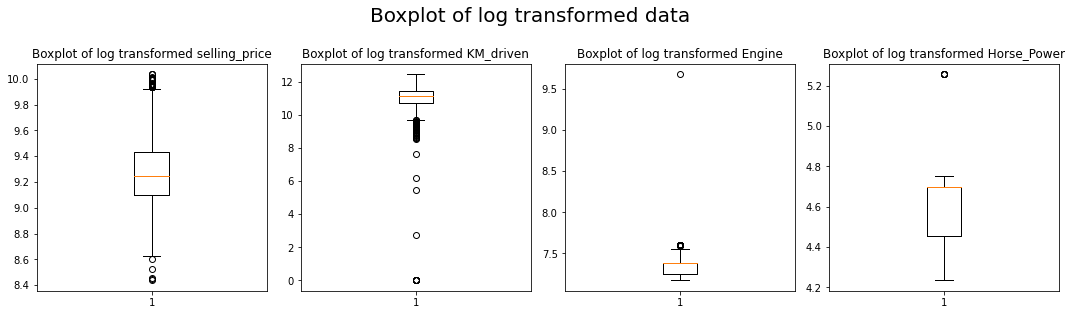

In [107]:
# Box PLot of log transformed data
fig = plt.figure(figsize=(15,15))
for i, col in enumerate(usedcars_col_list):
    plt.suptitle("Boxplot of log transformed data\n", fontsize=20)
    plt.subplot(len(usedcars_col_list), 4, i+1)
    plt.boxplot(np.log(usedcars_df[col]))
    plt.title("Boxplot of log transformed {}".format(col))
fig.tight_layout()
plt.show()

In [108]:
# Take the log of the variables and calculate the quartiles accordingly.
for col in usedcars_col_list:
    print(col)
    q75, q25 = np.percentile(np.log(usedcars_df[col]), [75 ,25])
    iqr = q75 - q25

    for threshold in np.arange(1,5,0.5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
            len((np.where((np.log(usedcars_df[col]) > max_val) 
                      | (np.log(usedcars_df[col]) < min_val))[0]))
        ))
    print(40*("--"))

selling_price
The score threshold is: 1.0
Number of outliers is: 137
The score threshold is: 1.5
Number of outliers is: 38
The score threshold is: 2.0
Number of outliers is: 1
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0
--------------------------------------------------------------------------------
KM_driven
The score threshold is: 1.0
Number of outliers is: 108
The score threshold is: 1.5
Number of outliers is: 48
The score threshold is: 2.0
Number of outliers is: 33
The score threshold is: 2.5
Number of outliers is: 23
The score threshold is: 3.0
Number of outliers is: 14
The score threshold is: 3.5
Number of outliers is: 11
The score threshold is: 4.0
Number of outliers is: 11
The score threshold is: 4.5
Number of outliers is: 10
-----------------------------------

### Univariate Analysis

In [138]:
# Getting discriptive statistics
usedcars_df.describe(include='all')

,year,KM_driven,Horse_Power,Engine,Doors,Gears,Sport_Model,selling_price,month_Aug,month_Dec,...,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,Fuel_Type_Diesel,Fuel_Type_Petrol,Color_Non-Metallic,Transmission_Manual
count,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410,1410,...,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,...,False,False,False,False,False,False,False,True,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1297,1342,...,1291,1274,1297,1339,1310,1334,1268,1251,946,1330
mean,2003.558865,73548.762411,101.009220,1571.890071,4.022695,5.024823,0.294326,11118.692908,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.470219,39471.221972,13.842593,426.070635,0.952109,0.184824,0.455901,3353.468505,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2002.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,0.000000,4611.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2002.000000,46369.000000,86.000000,1400.000000,3.000000,5.000000,0.000000,8957.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2003.000000,67840.000000,110.000000,1600.000000,4.000000,5.000000,0.000000,10388.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2004.000000,93069.500000,110.000000,1600.000000,5.000000,5.000000,1.000000,12455.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


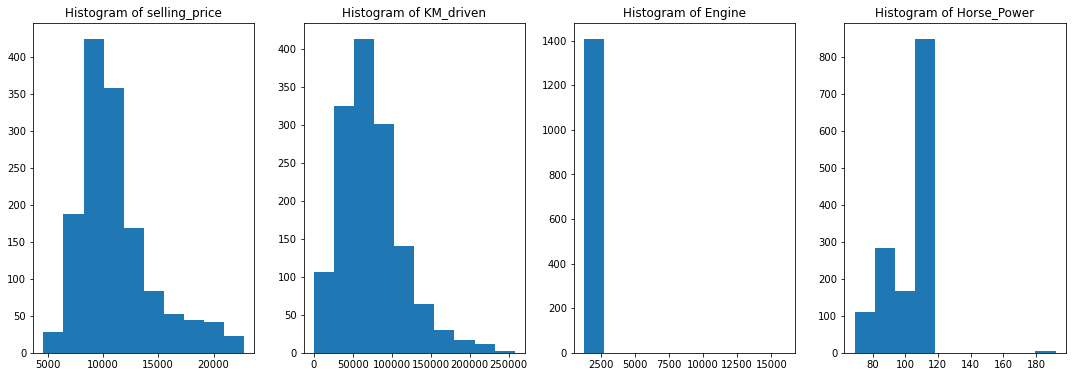

In [139]:
# Histogram plot of Original data
fig = plt.figure(figsize=(15,20))
for i, col in enumerate(usedcars_col_list):
    plt.subplot(len(usedcars_col_list), 4, i+1)
    plt.hist(usedcars_df[col])
    plt.title("Histogram of {}".format(col))
fig.tight_layout()
plt.show()

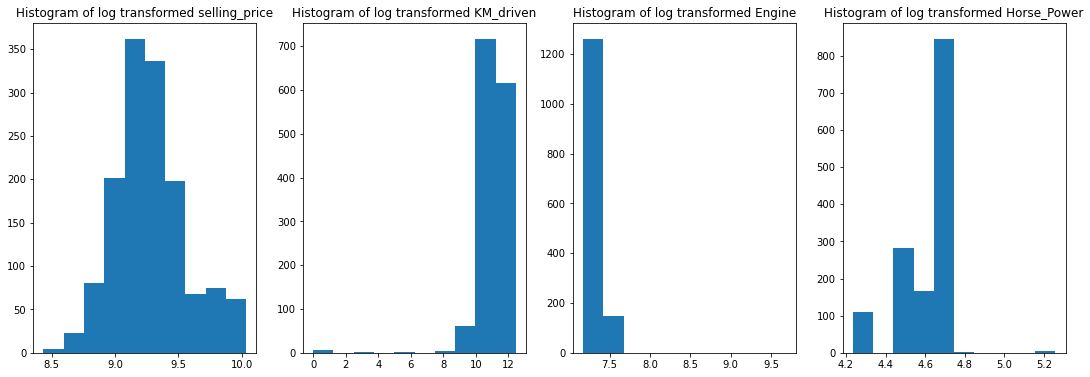

In [140]:
# Histogram of log transformed data

fig = plt.figure(figsize=(15,20))
for i, col in enumerate(usedcars_col_list):
    plt.subplot(len(usedcars_col_list), 4, i+1)
    plt.hist(np.log(usedcars_df[col]))
    plt.title("Histogram of log transformed {}".format(col))
fig.tight_layout()
plt.show()

In [141]:
# Creating Log transformed dataset
log_usedcars_df = pd.DataFrame()
for col in usedcars_col_list:
    log_usedcars_df[col]=np.log(usedcars_df[col])

In [142]:
# replace log transformed selling price variable with original selling_price
log_usedcars_df = log_usedcars_df.drop(['selling_price'], axis=1)

# Adding Target Variable and other non nopn transformed data to log_diabetes_df
log_usedcars_df["selling_price"]=usedcars_df["selling_price"]



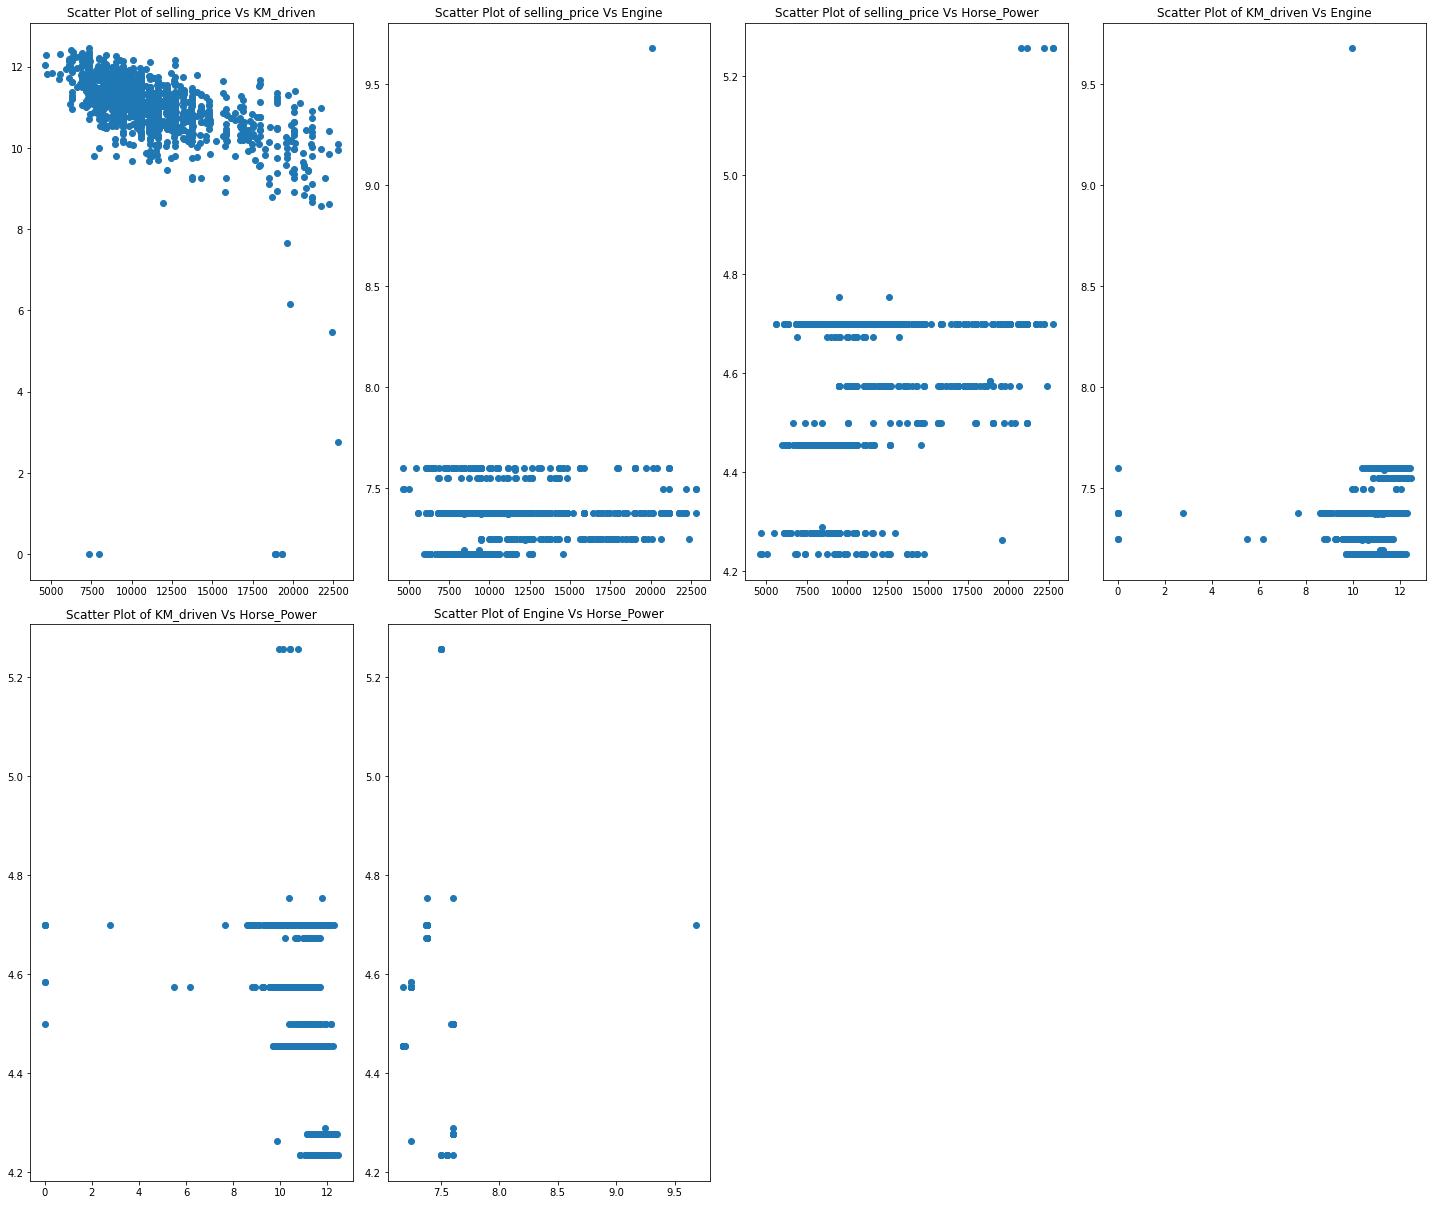

In [143]:
bi_con_list = list(itertools.combinations(usedcars_col_list,2))

fig = plt.figure(figsize=(20,50))
for i, col in enumerate(bi_con_list):
    plt.subplot(len(bi_con_list), 4, i+1)
    plt.scatter(log_usedcars_df[col[0]], log_usedcars_df[col[1]])
    plt.title("Scatter Plot of {} Vs {}".format(col[0],col[1]))
fig.tight_layout()
plt.show()

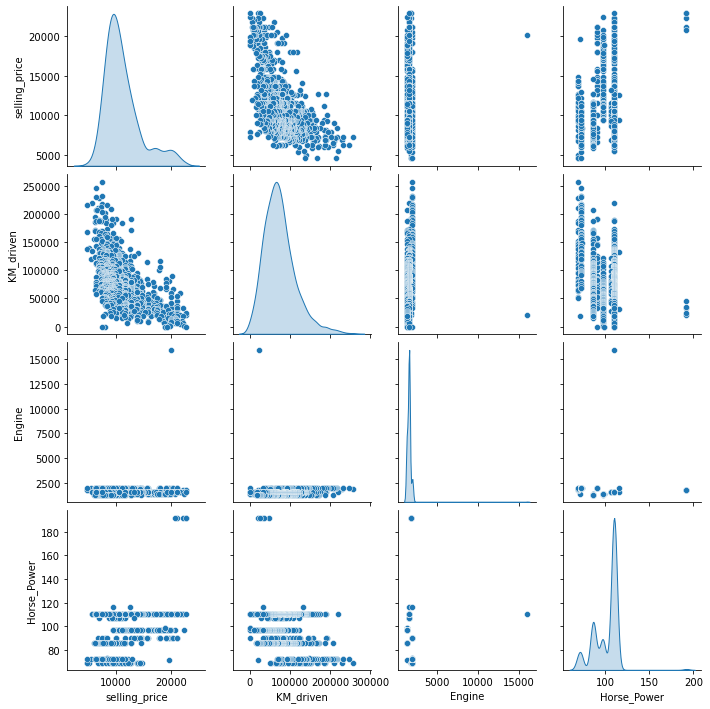

In [144]:
sns.pairplot(usedcars_df, vars=['selling_price', 'KM_driven', 'Engine', 'Horse_Power'], diag_kind='kde')
plt.show()

# Data Validation

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [117]:
results = {}

# Iterate over models dictionary and train each model. Print and store each model's MAE, R2, and RMSE score
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae_score = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    results[model_name] = {"MAE": mae_score, "R2": r2, "RMSE": rmse}
    
    # print(f"{model_name} MAE: {mae_score}, R2: {r2}, RMSE: {rmse}")

# Output the results
for model_name, metrics in results.items():
    print(f"{model_name}\nMAE: {metrics['MAE']}, R2: {metrics['R2']}, RMSE: {metrics['RMSE']}\n")


Linear Regression
MAE: 979.9066386676545, R2: 0.8191542217314529, RMSE: 1262.3583461496914

Logistic Regression
MAE: 1948.4716312056737, R2: 0.13478703831852845, RMSE: 2761.149849774148

Decision Tree
MAE: 1173.758865248227, R2: 0.7591062250645262, RMSE: 1456.938624660754

Random Forest
MAE: 845.2344089834515, R2: 0.868460860017565, RMSE: 1076.6039461782207

Gradient Boost
MAE: 795.2039956778958, R2: 0.8815160979293171, RMSE: 1021.7817525121691

XGBoost
MAE: 899.5740784990027, R2: 0.8478117690010596, RMSE: 1158.027846500895



In [118]:
validation={}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred_valid = model.predict(X_validate)
    
    mae_score = mean_absolute_error(y_validate, y_pred_valid)
    r2 = r2_score(y_validate, y_pred_valid)
    rmse = mean_squared_error(y_validate, y_pred_valid, squared=False)
    
    validation[model_name] = {"MAE": mae_score, "R2": r2, "RMSE": rmse}
    
    # print(f"{model_name} MAE: {mae_score}, R2: {r2}, RMSE: {rmse}")

# Output the results
for model_name, metrics in validation.items():
    print(f"{model_name}\nMAE: {metrics['MAE']}, R2: {metrics['R2']}, RMSE: {metrics['RMSE']}\n")

Linear Regression
MAE: 1098.6463919212638, R2: 0.8156882233107704, RMSE: 1497.9579811929802

Logistic Regression
MAE: 2261.340425531915, R2: 0.0984574547068735, RMSE: 3312.9600721584784

Decision Tree
MAE: 1294.2021276595744, R2: 0.7540660413290835, RMSE: 1730.343551137906

Random Forest
MAE: 1034.9301394799054, R2: 0.8312239557038477, RMSE: 1433.436604192441

Gradient Boost
MAE: 978.3386471158499, R2: 0.8446310896454284, RMSE: 1375.324401410957

XGBoost
MAE: 1059.0373864140072, R2: 0.8270315717702572, RMSE: 1451.130626052124



# Feature Importance

In [119]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,criterion="entropy", random_state=42, n_jobs=-1)

model.fit(X, y)
importances = model.feature_importances_
importances

array([0.17622396, 0.26794838, 0.05114821, 0.04423117, 0.07545192,
       0.00720429, 0.0517929 , 0.02234466, 0.01365501, 0.02448711,
       0.03377035, 0.0249231 , 0.02421354, 0.02411825, 0.02108431,
       0.01315998, 0.0175129 , 0.01628757, 0.00828837, 0.01276401,
       0.0563906 , 0.01299939])

Text(0, 0.5, 'Features')

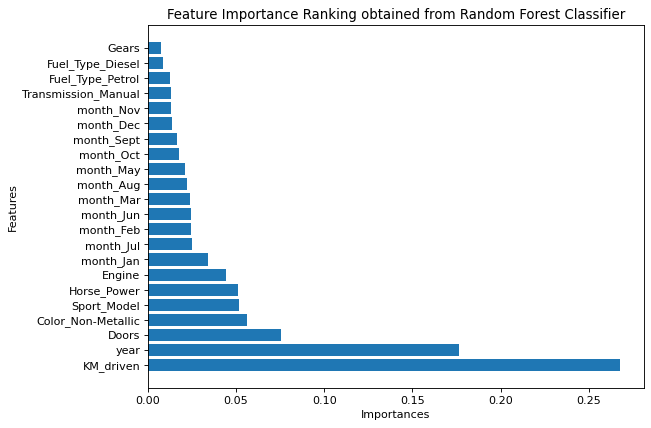

In [120]:
importances = pd.DataFrame({
    "Feature": list(X.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(8, 6), dpi=80)
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")

In [121]:
importances.sort_values(by="Importance", ascending=True)


,Importance
Feature,
Gears,0.007204
Fuel_Type_Diesel,0.008288
Fuel_Type_Petrol,0.012764
Transmission_Manual,0.012999
month_Nov,0.013160
month_Dec,0.013655
month_Sept,0.016288
month_Oct,0.017513
month_May,0.021084


In [122]:
# X = X.drop(['Gears', 'Fuel_Type_Diesel'], axis = 1)
X = X.drop(['month_Nov','month_Dec','Fuel_Type_Petrol',
'Transmission_Manual','month_Sept','month_Oct','month_May','month_Aug','month_Jun','month_Jul','month_Mar','month_Feb','month_Jan'], axis = 1)
X.head()

,year,KM_driven,Horse_Power,Engine,Doors,Gears,Sport_Model,Fuel_Type_Diesel,Color_Non-Metallic
0,2006,49805.0,90,2000,3,5,0,True,False
1,2006,77313.0,90,2000,3,5,0,True,False
2,2006,44214.0,90,2000,3,5,0,True,False
3,2006,50880.0,90,2000,3,5,0,True,True
4,2006,40810.0,90,2000,3,5,0,True,True


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [124]:
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(), 
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boost": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(objective ='reg:squarederror'),
}

results = {}

# Iterate over models dictionary and train each model. Print and store each model's MAE, R2, and RMSE score
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae_score = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    results[model_name] = {"MAE": mae_score, "R2": r2, "RMSE": rmse}
    
    # print(f"{model_name} MAE: {mae_score}, R2: {r2}, RMSE: {rmse}")

# Output the results
for model_name, metrics in results.items():
    print(f"{model_name}\nMAE: {metrics['MAE']}, R2: {metrics['R2']}, RMSE: {metrics['RMSE']}\n")


Linear Regression
MAE: 1010.6762297140081, R2: 0.8100667240836125, RMSE: 1293.6863557547806

Logistic Regression
MAE: 1943.5851063829787, R2: 0.13664095214024763, RMSE: 2758.190070415563

Decision Tree
MAE: 1061.973404255319, R2: 0.7663332166831205, RMSE: 1434.917586347707

Random Forest
MAE: 868.661763086795, R2: 0.8461574916036146, RMSE: 1164.3046837342229

Gradient Boost
MAE: 793.3371644571711, R2: 0.8807852328846479, RMSE: 1024.9283254256925

XGBoost
MAE: 934.1140171348626, R2: 0.8338037611621505, RMSE: 1210.1496063390196



In [125]:
validation={}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred_valid = model.predict(X_validate)
    
    mae_score = mean_absolute_error(y_validate, y_pred_valid)
    r2 = r2_score(y_validate, y_pred_valid)
    rmse = mean_squared_error(y_validate, y_pred_valid, squared=False)
    
    validation[model_name] = {"MAE": mae_score, "R2": r2, "RMSE": rmse}
    
    # print(f"{model_name} MAE: {mae_score}, R2: {r2}, RMSE: {rmse}")

# Output the results
for model_name, metrics in validation.items():
    print(f"{model_name}\nMAE: {metrics['MAE']}, R2: {metrics['R2']}, RMSE: {metrics['RMSE']}\n")

Linear Regression
MAE: 1122.836032743886, R2: 0.809664619909841, RMSE: 1522.2390206492178

Logistic Regression
MAE: 2254.950354609929, R2: 0.10288879507943571, RMSE: 3304.8079675115255

Decision Tree
MAE: 1245.1879432624114, R2: 0.7652119362541169, RMSE: 1690.6787560114337

Random Forest
MAE: 1080.6867071935158, R2: 0.8247678914934724, RMSE: 1460.5954110691068

Gradient Boost
MAE: 992.6225618811236, R2: 0.842398963567443, RMSE: 1385.1685521544243

XGBoost
MAE: 1136.0191728307846, R2: 0.8062890781851899, RMSE: 1535.6779283593496



# Fine-tuning the model

In [126]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for each model
hyperparameters = {
    "Linear Regression": {},
    "Logistic Regression": {},
    "Decision Tree": {
        "max_depth": [1, 5, 10], 
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 500],
        "max_features": ['auto', 'sqrt'],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Gradient Boost": {
        "learning_rate": [0.1, 0.05, 0.01],
        "n_estimators": [100, 200, 500],
        "max_depth": [3, 5, 7],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGBoost": {
        "learning_rate": [0.1, 0.05, 0.01],
        "n_estimators": [100, 200, 500],
        "max_depth": [3, 5, 7],
        "min_child_weight": [1, 3, 5]
    }
}

# Fine-tune the models and evaluate the performance
for model_name, model in models.items():
    # Define the hyperparameters grid for the current model
    params_grid = hyperparameters[model_name]
    
    # Perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(model, params_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Evaluate the performance of the best model
    y_pred = best_model.predict(X_test)
    mae_score = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Store the results
    results[model_name]["Best Params"] = best_params
    results[model_name]["Tuned Model"] = best_model
    results[model_name]["MAE"] = mae_score
    results[model_name]["R2"] = r2
    results[model_name]["RMSE"] = rmse

# Output the results
for model_name, metrics in results.items():
    print(f"{model_name}")
    print(f"Best Params: {metrics['Best Params']}")
    print(f"MAE: {metrics['MAE']}, R2: {metrics['R2']}, RMSE: {metrics['RMSE']}\n")


Linear Regression
Best Params: {}
MAE: 1010.6762297140081, R2: 0.8100667240836125, RMSE: 1293.6863557547806

Logistic Regression
Best Params: {}
MAE: 1943.5851063829787, R2: 0.13664095214024763, RMSE: 2758.190070415563

Decision Tree
Best Params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
MAE: 893.9189497745165, R2: 0.8412032588382623, RMSE: 1182.9033482745797

Random Forest
Best Params: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
MAE: 790.123517942525, R2: 0.871620873326082, RMSE: 1063.593505535338

Gradient Boost
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
MAE: 791.8409393831059, R2: 0.8811197371256095, RMSE: 1023.4893941875746

XGBoost
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}
MAE: 803.0501492547651, R2: 0.8764646185065403, RMSE: 1043.33589388734



In [131]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for each model
hyperparameters = {
    "Linear Regression": {},
    "Logistic Regression": {},
    "Decision Tree": {
        "max_depth": [5, 10, 15], 
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [200, 500, 1000],
        "max_features": ['auto', 'sqrt'],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Gradient Boost": {
        "learning_rate": [0.1, 0.05, 0.01],
        "n_estimators": [200, 500, 1000],
        "max_depth": [3, 5, 7],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGBoost": {
        "learning_rate": [0.1, 0.05, 0.01],
        "n_estimators": [200, 500, 1000],
        "max_depth": [3, 5, 7],
        "min_child_weight": [1, 3, 5]
    }
}

# Fine-tune the models and evaluate the performance
for model_name, model in models.items():
    # Define the hyperparameters grid for the current model
    params_grid = hyperparameters[model_name]
    
    # Perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(model, params_grid, scoring='r2', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Evaluate the performance of the best model
    y_pred = best_model.predict(X_test)
    mae_score = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Store the results
    results[model_name]["Best Params"] = best_params
    results[model_name]["Tuned Model"] = best_model
    results[model_name]["MAE"] = mae_score
    results[model_name]["R2"] = r2
    results[model_name]["RMSE"] = rmse

# Output the results
for model_name, metrics in results.items():
    print(f"{model_name}")


Linear Regression
Logistic Regression
Decision Tree
Random Forest
Gradient Boost
XGBoost


In [132]:
for model_name, metrics in results.items():
    print(f"{model_name}")
    print(f"Best Params: {metrics['Best Params']}")
    print(f"MAE: {metrics['MAE']}, R2: {metrics['R2']}, RMSE: {metrics['RMSE']}\n")


Linear Regression
Best Params: {}
MAE: 1010.6762297140081, R2: 0.8100667240836125, RMSE: 1293.6863557547806

Logistic Regression
Best Params: {}
MAE: 1943.5851063829787, R2: 0.13664095214024763, RMSE: 2758.190070415563

Decision Tree
Best Params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
MAE: 893.9189497745165, R2: 0.8412032588382623, RMSE: 1182.9033482745797

Random Forest
Best Params: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
MAE: 795.4106697323895, R2: 0.8700411159053658, RMSE: 1070.117472436796

Gradient Boost
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000}
MAE: 790.3714993796675, R2: 0.882373931620483, RMSE: 1018.0761389885137

XGBoost
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 1000}
MAE: 798.7095834718529, R2: 0.8764609415834362, RMSE: 1043.3514207641822



Linear Regression
Best Params: {}
MAE: 1010.6762297140081
R2: 0.8100667240836125
RMSE: 1293.6863557547806


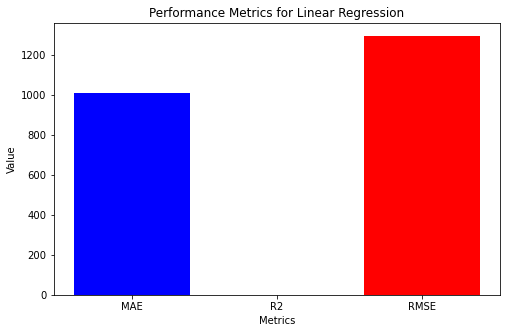

Logistic Regression
Best Params: {}
MAE: 1943.5851063829787
R2: 0.13664095214024763
RMSE: 2758.190070415563


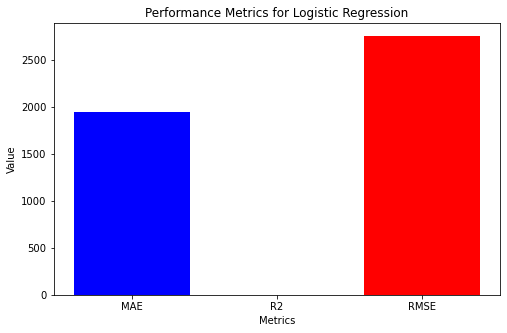

Decision Tree
Best Params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
MAE: 897.8657582851548
R2: 0.8407991635599344
RMSE: 1184.4074784645368


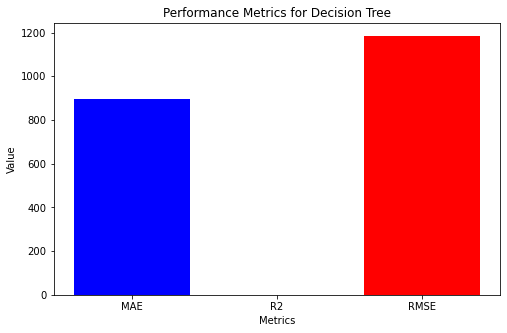

Random Forest
Best Params: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
MAE: 792.2879488139615
R2: 0.8715709371069411
RMSE: 1063.8003408517964


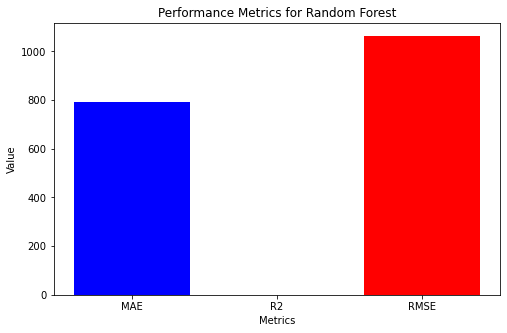

Gradient Boost
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000}
MAE: 790.3714993796673
R2: 0.882373931620483
RMSE: 1018.0761389885135


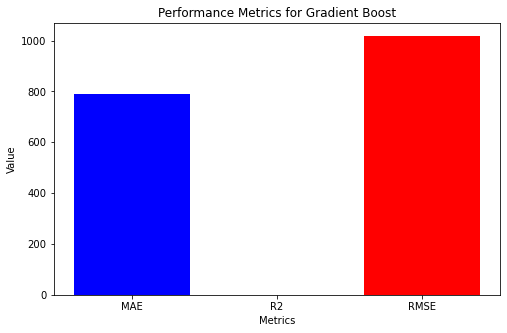

XGBoost
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 1000}
MAE: 798.7095834718529
R2: 0.8764609415834362
RMSE: 1043.3514207641822


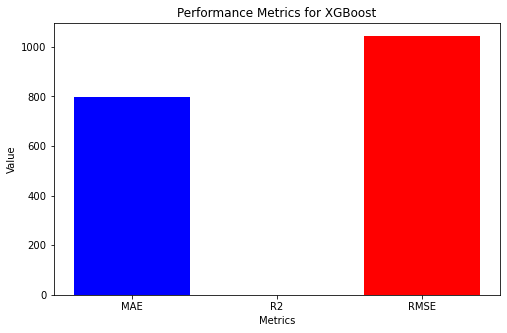

In [129]:
for model_name, metrics in results.items():
    print(f"{model_name}")
    print("Best Params:", metrics["Best Params"])
    print("MAE:", metrics["MAE"])
    print("R2:", metrics["R2"])
    print("RMSE:", metrics["RMSE"])

    # Plotting
    labels = ['MAE', 'R2', 'RMSE']
    values = [metrics["MAE"], metrics["R2"], metrics["RMSE"]]

    plt.figure(figsize=(8, 5))
    plt.bar(labels, values, color=['blue', 'green', 'red'])
    plt.title(f"Performance Metrics for {model_name}")
    plt.xlabel("Metrics")
    plt.ylabel("Value")
    plt.show()